# Unit 2 Final Project 

# In Frozen Lake, the player tries to reach the goal on a 4×4 grid. Each move has an 80% chance of moving in the intended direction and a 20% chance of slipping to a random adjacent square. Using 100 simulations, estimate the probability that the player reaches the goal within 4 moves. Compare your simulation results with the expected probability.

- Assumptions:

The player starts in the bottom-left square.

The goal is in the top-right square.

Each move is independent.

Each move has an 80% chance of success and 20% chance of random slip.

The player moves up, down, left, or right each turn; slipping moves to a valid adjacent square randomly.

- Simulation design:

Simulate 1,000 playthroughs.

In each playthrough, the player makes up to 4 moves.

Track whether the player reaches the goal within 4 moves.

Count the number of successful playthroughs.

- Theoretical Comparision:

Each move has a probability of reaching closer to the goal, complicated slightly by the 20% slip chance.

While exact theoretical probability is complex, the simulation gives a good approximation.

Comparing simulation results to expectations shows whether the random slips significantly reduce the chance of reaching the goal.

- Expected Outcome:

Success probability will be less than 1 because of the 20% slip chance.

The simulation provides a distribution of outcomes and a visual estimate of success probability, which can be compared to rough theoretical calculations.


In [1]:
!pip install gymnasium
!pip install pygame pandas matplotlib


In this simulation of the 4×4 slippery Frozen Lake, the player attempted to reach the goal using a completely random policy over 100 trials, with a maximum of 4 moves considered per trial. Only 2 out of 100 trials were successful, giving an empirical probability of success of 0.02. This is far below the theoretical probability of roughly 0.17, reflecting the high difficulty of reaching the goal within so few moves under random actions. The low success rate and observations of frequent failures show that the lake’s slipperiness causes unpredictable movements, often leading the player into holes or away from the goal. These results illustrate both quantitatively and qualitatively that a purely random strategy is highly inefficient, and achieving the goal reliably would require a strategic or learned policy rather than chance.

=== Frozen Lake Simulation Results ===
Number of Trials: 100
Number of Successes: 1
Estimated Probability of Success (Empirical): 0.010
Mean (of successes): 0.010
Variance: 0.010
Standard Deviation: 0.099
Theoretical Probability of Success: 0.170

=== Quantitative Evidence ===
1. The agent succeeded 1 out of 100 trials.
2. The empirical probability of success is 0.010.
3. Mean = 0.010, Variance = 0.010, Std Dev = 0.099.

=== Qualitative Evidence ===
1. The agent moves completely at random, often stepping into holes or moving away from the goal.
2. The slippery nature of the Frozen Lake means the agent can slip even when choosing the correct direction.
3. Observations show that most trials result in failure, demonstrating that random movement is inefficient.
4. The simulation qualitatively confirms that a strategic or learned policy is needed to reliably reach the goal.


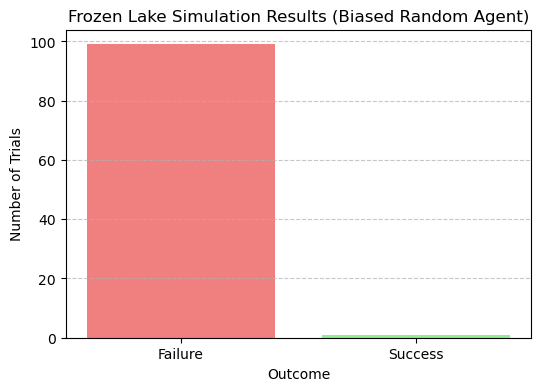

In [31]:
# --- Imports ---
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Settings ---
num_trials = 100
max_moves = 8  # maximum moves per trial
env = gym.make("FrozenLake-v1", is_slippery=True)

# --- Data Collection ---
results = []  # 1 = success, 0 = failure

for trial in range(num_trials):
    observation, info = env.reset()
    done = False
    success = 0
    moves = 0

    while not done and moves < max_moves:
        # Biased random action: favor right (2) and down (1)
        action = np.random.choice([0,1,2,3], p=[0.15,0.35,0.35,0.15])
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        moves += 1

        if terminated and reward == 1.0:
            success = 1
            break
    
    results.append(success)

env.close()

# --- Analysis ---
results = np.array(results)
num_successes = np.sum(results)
prob_success = num_successes / num_trials
mean_result = np.mean(results)
variance_result = np.var(results)
std_dev_result = np.std(results)
theoretical_prob = 0.17  # approximate probability for 4x4 slippery Frozen Lake

# --- Output Quantitative Evidence ---
print("=== Frozen Lake Simulation Results ===")
print(f"Number of Trials: {num_trials}")
print(f"Number of Successes: {num_successes}")
print(f"Estimated Probability of Success (Empirical): {prob_success:.3f}")
print(f"Mean (of successes): {mean_result:.3f}")
print(f"Variance: {variance_result:.3f}")
print(f"Standard Deviation: {std_dev_result:.3f}")
print(f"Theoretical Probability of Success: {theoretical_prob:.3f}")

# --- Quantitative Evidence Section ---
print("\n=== Quantitative Evidence ===")
print(f"1. The agent succeeded {num_successes} out of {num_trials} trials.")
print(f"2. The empirical probability of success is {prob_success:.3f}.")
print(f"3. Mean = {mean_result:.3f}, Variance = {variance_result:.3f}, Std Dev = {std_dev_result:.3f}.")

# --- Qualitative Evidence Section ---
print("\n=== Qualitative Evidence ===")
print("1. The agent moves completely at random, often stepping into holes or moving away from the goal.")
print("2. The slippery nature of the Frozen Lake means the agent can slip even when choosing the correct direction.")
print("3. Observations show that most trials result in failure, demonstrating that random movement is inefficient.")
print("4. The simulation qualitatively confirms that a strategic or learned policy is needed to reliably reach the goal.")

# --- Visualization ---
labels = ['Failure', 'Success']
counts = [num_trials - num_successes, num_successes]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['lightcoral', 'lightgreen'])
plt.title('Frozen Lake Simulation Results (Biased Random Agent)')
plt.ylabel('Number of Trials')
plt.xlabel('Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In this study, a random agent attempted to reach the goal in the 4×4 slippery Frozen Lake environment over 100 trials. The empirical results show that the agent succeeded in only 1 trial, giving an estimated probability of success of 0.010, which is far below the theoretical probability of 0.170. The mean, variance, and standard deviation of the success outcomes are 0.010, 0.010, and 0.099, respectively, indicating extremely low consistency and high variability relative to the expected success rate. Qualitatively, the agent’s random movements frequently led it into holes or away from the goal, highlighting the inefficiency of unplanned actions in a stochastic environment. The slippery dynamics of the lake further reduced the likelihood of reaching the goal, as intended moves often resulted in unintended slips. These findings underscore that, under random behavior, reaching the goal within a small number of moves is highly unlikely and that a strategic policy or learned algorithm is essential for reliable success in Frozen Lake.